# Wine Quality Prediction Model



## Step 1: Importing and Analysing the data 
- Importing the data and analysing the data.
- Preproccessing the data for null values


In [69]:
import pandas as pd
import numpy as np

In [70]:
data = pd.read_excel('Wine_Quality.xlsx')

In [71]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [73]:
data[data['total sulfur dioxide'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.5,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.8,10.5,5.0


In [74]:
data[data['pH'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.997,NaN,0.58,9.3,6.0


In [75]:
data[data['quality'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
123,8.0,0.71,0.0,2.6,0.08,11.0,34.0,0.9976,3.44,0.53,9.5,NaN


In [76]:
data.drop(9, axis = 0, inplace = True)
data.drop(184, axis = 0, inplace = True)
data.drop(123, axis = 0, inplace = True)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1596 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   float64
dtypes: float64(12)
memory usage: 162.1 KB


### Conclusion
- We found three null values. the null values were removed from the dataset

## Step 2: Visualisng the data
- Visualising the data to understand which model to use.

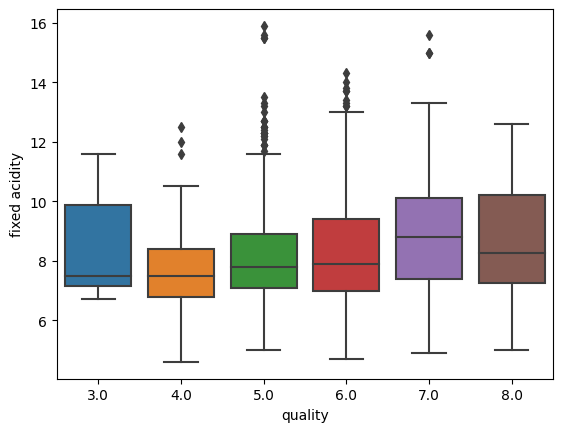

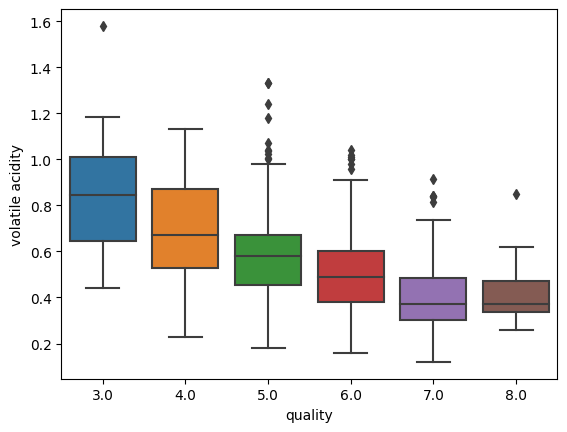

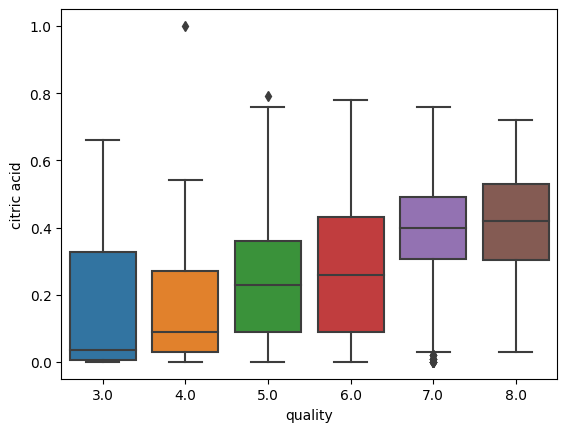

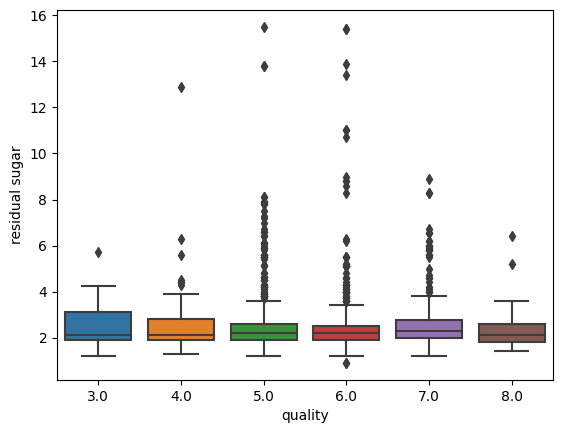

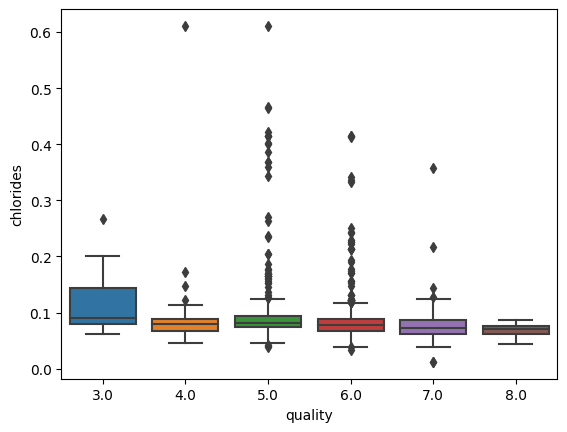

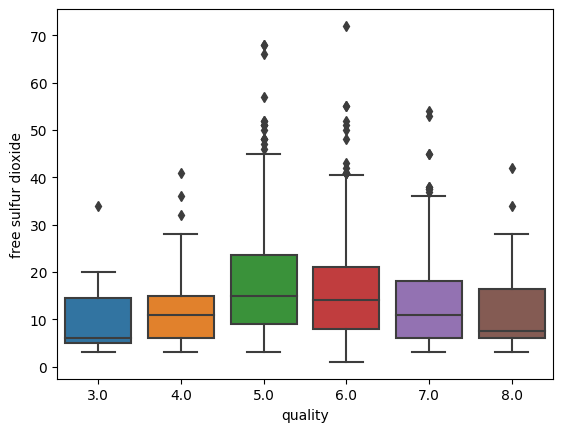

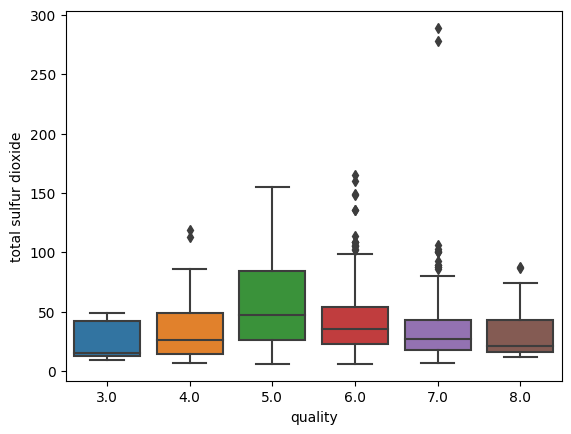

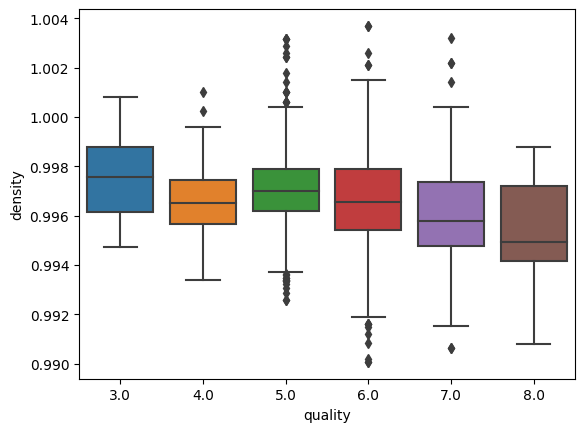

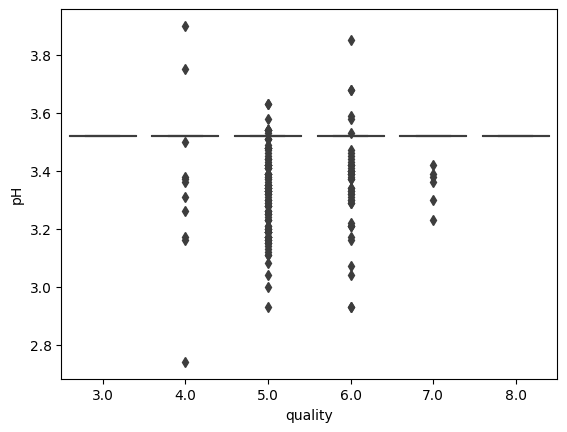

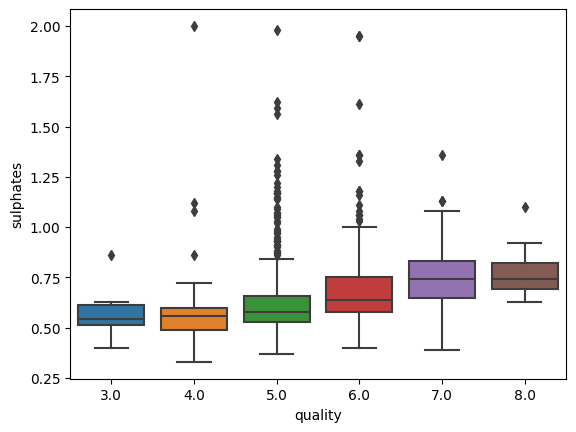

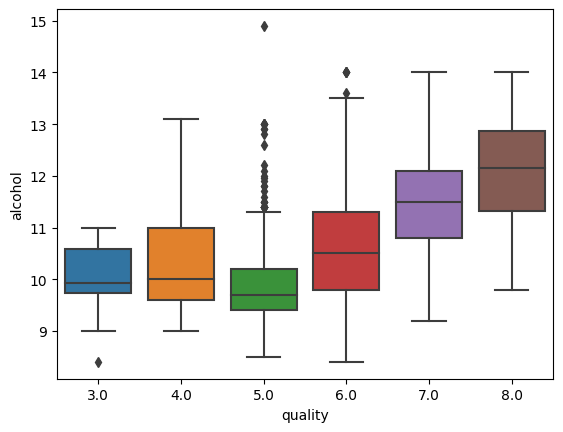

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
features = data.drop('quality', axis = 1).columns
for feature in features:
    sns.boxplot(x = 'quality',y = feature, data = data)
    plt.show()

In [79]:
reviews = []
for i in data['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    if i >= 4 and i <= 7:
        reviews.append('2')
    if i >= 8 and i <= 10:
        reviews.append('3')
data['reviews'] = reviews

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1596 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   float64
 12  reviews               1596 non-null   object 
dtypes: float64(12), object(1)
memory usage: 174.6+ KB


In [81]:
data['reviews'].value_counts()

reviews
2    1568
3      18
1      10
Name: count, dtype: int64

### Conclusion
- It is clear from the above visualisation, KNN can not be used.
- Regression model will be the most suitable for our scenario

## Step 3: Constructing the model and checking accuracy
- There are many regression models. We will check the following models:
    - Logistic Regression
    - Decision Tree Classifier
    - Random Forest Classifier

In [82]:
x = data.iloc[:, :11]
y = data['reviews']

x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [83]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: reviews, dtype: object

### As the units of measurement is different, we need to use a scaler to scale the values, we use StandardScaler in this case

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [85]:
x

array([[-0.52904176,  0.96223523, -1.39192434, ...,  0.14057855,
        -0.57917007, -0.9610637 ],
       [-0.2993646 ,  1.96727417, -1.39192434, ..., -3.72131159,
         0.12865108, -0.58572765],
       [-0.2993646 ,  1.29724821, -1.18657111, ..., -2.97384898,
        -0.04830421, -0.58572765],
       ...,
       [-1.16065393, -0.09863921, -0.72452634, ...,  0.26515565,
         0.54154675,  0.54028048],
       [-1.39033109,  0.65514   , -0.77586465, ...,  0.26515565,
         0.30560636, -0.21039161],
       [-1.3329118 , -1.21534915,  1.02097612, ...,  0.26515565,
         0.01068089,  0.54028048]])

### PCA is used to reduce the dimensionality

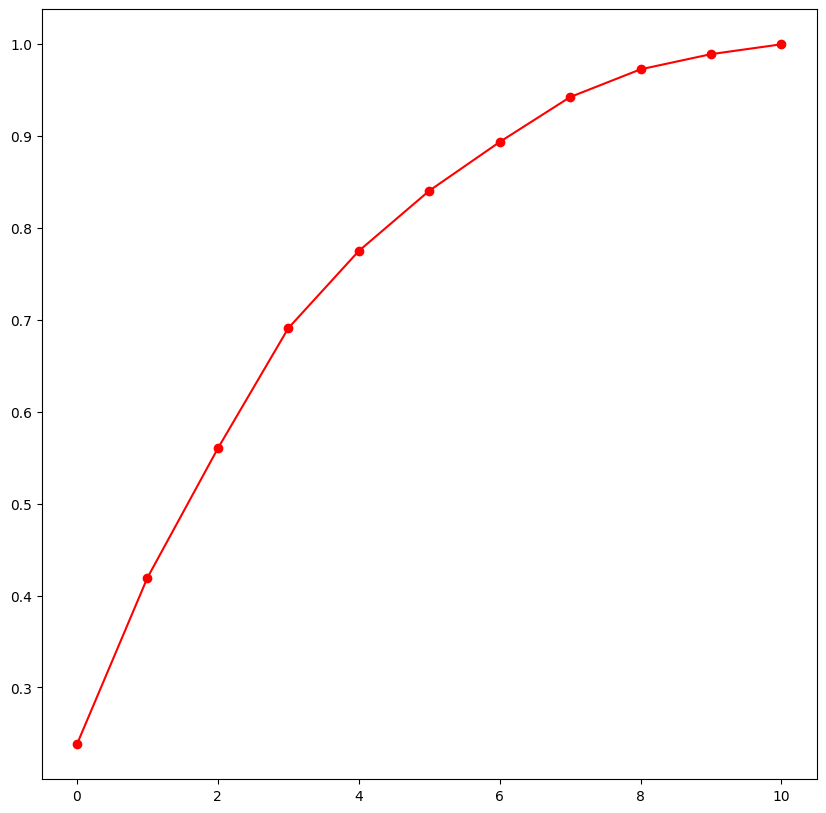

In [86]:
from sklearn.decomposition import PCA
pca = PCA()

x_pca = pca.fit_transform(x)

plt.figure(figsize=(10, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.show()

In [87]:
pca_new = PCA(n_components = 8)
x_new = pca_new.fit_transform(x)

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.20)

In [89]:
X_train.shape

(1276, 8)

In [90]:
X_test.shape

(320, 8)

In [91]:
y_train.shape, y_test.shape

((1276,), (320,))

## Logistic Regression Model

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [93]:
accuracy_score(y_test, lr_predict)

0.98125

- Logistic Regression Model can predict to 99.375% accuracy

## Decision Tree Model

In [94]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)

In [95]:
accuracy_score(y_test, dt_predict)

0.971875

- Decision Tree Model can predict to 97.18% accuracy

## Random Forest Model

In [96]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

In [97]:
accuracy_score(y_test, rf_predict)

0.984375

- Random Forest Model can predict to 99.375% accuracy

# Conclusion
- We tested our dataset on various regression models.
- The best accuracy could be achieved using Random Forest Model and Logistic Regression Model
- Random Forest Model is best suited